In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv('./car_prices.csv')
df.head()

,car_id,mileage,selling_price
0,A001,126958,9734
1,A002,151867,8775
2,A003,136932,3928
3,A004,108694,12454
4,A005,124879,6634


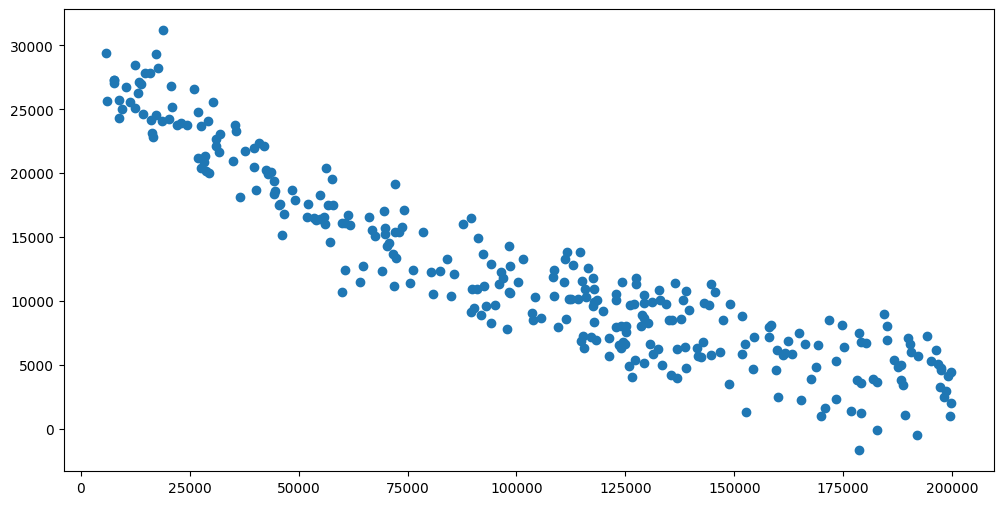

In [2]:
from matplotlib import pyplot as plt

plt.figure(figsize=(12, 6))
plt.scatter(df['mileage'], df['selling_price'])
plt.show()

In [3]:
from sklearn.model_selection import train_test_split

X = df[['mileage']]
y = df['selling_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [4]:
X.shape

(300, 1)

In [5]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [6]:
X_train[:5]

,mileage
102,44504
108,43660
96,125151
294,64040
11,131324


In [7]:
X_train_poly[:5]

array([[1.00000000e+00, 4.45040000e+04, 1.98060602e+09],
       [1.00000000e+00, 4.36600000e+04, 1.90619560e+09],
       [1.00000000e+00, 1.25151000e+05, 1.56627728e+10],
       [1.00000000e+00, 6.40400000e+04, 4.10112160e+09],
       [1.00000000e+00, 1.31324000e+05, 1.72459930e+10]])

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()
model.fit(X_train_poly, y_train)

LinearRegression()

In [9]:
y_pred = model.predict(X_test_poly)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mse, r2

(3942449.0425748434, 0.9161450769968139)

In [10]:
import numpy as np

In [11]:
x_range = np.linspace(X['mileage'].min(), X['mileage'].max(), 300).reshape(-1, 1)
x_range_poly = poly.transform(x_range)
y_range_pred = model.predict(x_range_poly)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


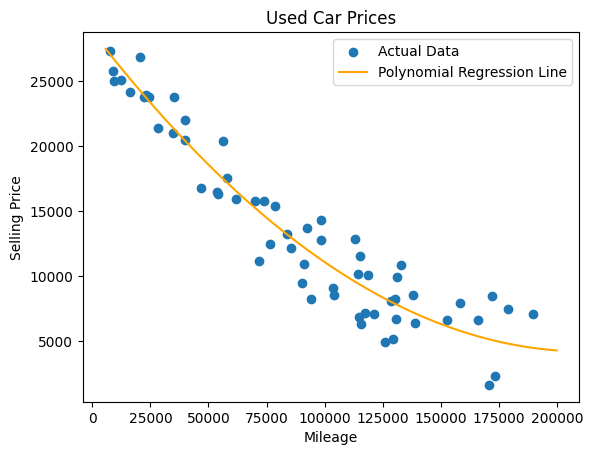

In [12]:
plt.scatter(X_test['mileage'], y_test, label='Actual Data')
plt.plot(x_range, y_range_pred, color='orange', label='Polynomial Regression Line')
plt.title('Used Car Prices')
plt.xlabel('Mileage')
plt.ylabel('Selling Price')
plt.legend()
plt.show()

In [13]:
df = pd.read_csv("student_scores.csv")

df.head()

,hours,scores
0,4.4,20.0
1,9.6,90.0
2,7.6,58.0
3,6.4,31.0
4,2.4,5.0


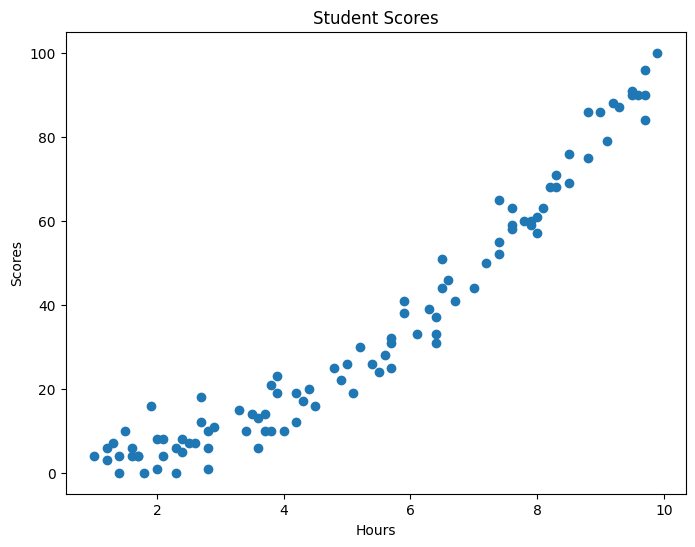

In [14]:
plt.figure(figsize=(8,6))
plt.scatter(df['hours'], df['scores'])
plt.title('Student Scores')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

In [15]:
X = df[['hours']]
y = df['scores']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=5)

In [16]:
poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [17]:
model = LinearRegression()
model.fit(X_train_poly, y_train)

LinearRegression()

In [18]:
model.coef_, model.intercept_

(array([ 0.        , -3.81606488,  1.54373572, -0.02240549]),
 np.float64(7.136348420418358))

In [19]:
y_pred = model.predict(X_test_poly)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2

(20.259972954628125, 0.9732576914537644)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


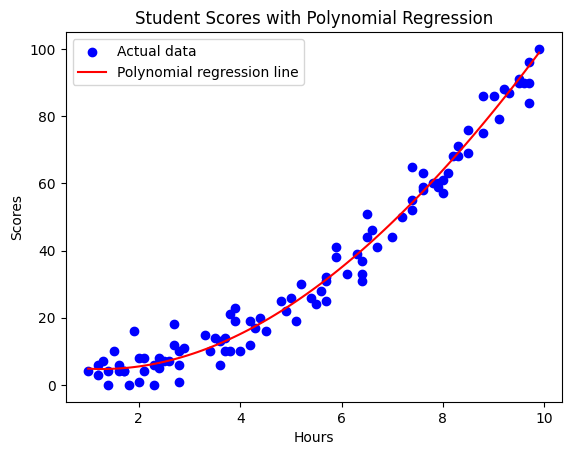

In [24]:
plt.scatter(df['hours'], df['scores'], color='blue', label='Actual data')
X_range = np.linspace(df['hours'].min(), df['hours'].max(), 100).reshape(-1, 1)
X_range_poly = poly.transform(X_range)
y_range_pred = model.predict(X_range_poly)
plt.plot(X_range, y_range_pred, color='red', label='Polynomial regression line')

plt.title('Student Scores with Polynomial Regression')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.legend()
plt.show()